In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [231]:
data = pd.read_csv('laptops.csv')
data = data.rename(columns={'Storage type' : 'TypeStorage', 'Final Price' : 'Price'})
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,TypeStorage,GPU,Screen,Touch,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Laptop'] = le.fit_transform(data['Laptop'])
data['Status'] = le.fit_transform(data['Status'])
data['Brand'] = le.fit_transform(data['Brand'])
data['Model'] = le.fit_transform(data['Model'])
data['TypeStorage'] = le.fit_transform(data['TypeStorage'])
data['CPU'] = le.fit_transform(data['CPU'])
data['GPU'] = le.fit_transform(data['GPU'])
data['Touch'] = le.fit_transform(data['Touch'])
data

,Laptop,Status,Brand,Model,CPU,RAM,Storage,TypeStorage,GPU,Screen,Touch,Price
0,39,0,3,42,17,8,512,0,44,15.6,0,1009.00
1,487,0,1,54,14,8,256,0,44,15.6,0,299.00
2,33,0,3,42,16,8,256,0,44,15.6,0,789.00
3,1736,0,14,58,18,16,1000,0,17,15.6,0,1199.00
4,942,0,9,4,17,16,512,0,44,15.6,0,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2110,1,21,22,18,16,1000,0,18,17.3,0,2699.99
2156,2111,1,21,22,18,16,1000,0,19,17.3,0,2899.99
2157,2112,1,21,22,18,32,1000,0,20,17.3,0,3399.99
2158,2119,1,21,23,21,16,1000,0,44,13.4,1,1899.99


In [233]:
data.dropna(inplace=True)

In [234]:
data.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'TypeStorage', 'GPU', 'Screen', 'Touch', 'Price'],
      dtype='object')

In [235]:
selected_features=['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'TypeStorage', 'GPU', 'Screen', 'Touch']
X = data[selected_features]
y = data['Price']

In [236]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest,chi2,f_regression
# configure to select all features
# f_regression - uses forlinear regression to select the features
# k - number of features needs to be selected
fs = SelectKBest(score_func=f_regression, k=7)
# learn relationship from training data
z=fs.fit_transform(X, y)
# returns a Boolean array indicating which features were selected by the algorithm
support = fs.get_support()
#Store the feature names
features = np.array(X.columns)
print("All features:")
print(features)
print("Selected best:")
print(features[support])
print(z)

All features:
['Laptop' 'Status' 'Brand' 'Model' 'CPU' 'RAM' 'Storage' 'TypeStorage'
 'GPU' 'Screen' 'Touch']
Selected best:
['Laptop' 'Brand' 'CPU' 'RAM' 'Storage' 'GPU' 'Screen']
[[3.900e+01 3.000e+00 1.700e+01 ... 5.120e+02 4.400e+01 1.560e+01]
 [4.870e+02 1.000e+00 1.400e+01 ... 2.560e+02 4.400e+01 1.560e+01]
 [3.300e+01 3.000e+00 1.600e+01 ... 2.560e+02 4.400e+01 1.560e+01]
 ...
 [2.112e+03 2.100e+01 1.800e+01 ... 1.000e+03 2.000e+01 1.730e+01]
 [2.119e+03 2.100e+01 2.100e+01 ... 1.000e+03 4.400e+01 1.340e+01]
 [2.120e+03 2.100e+01 2.100e+01 ... 2.560e+02 4.400e+01 1.340e+01]]


In [237]:
selected_features=['Laptop','Brand','CPU','RAM','Storage','GPU','Screen']
X = data[selected_features]
y = data['Price']

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [239]:
X_train

,Laptop,Brand,CPU,RAM,Storage,GPU,Screen
1126,310,3,7,16,512,44,14.0
1186,1061,9,17,8,256,44,14.0
926,1220,9,18,32,512,26,16.0
808,458,0,17,8,512,44,15.6
1362,848,8,18,16,512,19,15.6
...,...,...,...,...,...,...,...
1642,2010,16,18,16,512,17,14.4
1096,408,0,17,8,256,44,15.6
1131,514,2,15,8,256,44,12.0
1295,452,0,17,16,512,44,14.0


In [240]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1724, 7)
(1724,)
(432, 7)
(432,)


In [241]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [242]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [243]:
summary=pd.DataFrame(columns=['Algorithm','reg_name','train_Score','test_Score','r2score','mse','rmse','mae','evs'])
summary.head()

,Algorithm,reg_name,train_Score,test_Score,r2score,mse,rmse,mae,evs


In [244]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)
ts_lr =lr.score(X_train,y_train)
tts_lr =lr.score(X_test,y_test)
r2score_lr=r2_score(y_test,pred1)
mse1=mean_squared_error(y_test, pred1)
rmse1=math.sqrt(mse1)
mae1 = mean_absolute_error(y_test, pred1)
evs1=explained_variance_score(pred1,y_test)
df = {'Algorithm': 'linear Regression', 'reg_name': 'lr', 'train_Score': ts_lr,'test_Score':tts_lr,'r2score':r2score_lr,'mse':mse1,'rmse':rmse1,'mae':mae1,'evs':evs1}
summary = summary._append(df, ignore_index = True)

C:\Users\Иван\AppData\Local\Temp\ipykernel_10548\902668795.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary = summary._append(df, ignore_index = True)


In [245]:
summary

,Algorithm,reg_name,train_Score,test_Score,r2score,mse,rmse,mae,evs
0,linear Regression,lr,0.594716,0.584372,0.584372,355762.949665,596.458674,413.370476,0.23713


In [246]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)
pred2 = dtr.predict(X_test)
train_Score2 =dtr.score(X_train,y_train)
test_Score2 =dtr.score(X_test,y_test)
r2score2 =r2_score(y_test,pred2)
mse2=mean_squared_error(y_test, pred2)
rmse2=math.sqrt(mse1)
mae2 = mean_absolute_error(y_test, pred2)
evs2=explained_variance_score(pred2,y_test)
df = {'Algorithm': 'DecisionTreeRegressor', 'reg_name': 'dtr', 'train_Score': train_Score2,'test_Score':test_Score2,'r2score':r2score2,'mse':mse2,'rmse':rmse2,'mae':mae2,'evs':evs2}
summary = summary._append(df, ignore_index = True)

In [247]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
pred_l = lasso.predict(X_test)
train_Score_l =lasso.score(X_train,y_train)
test_Score_l =lasso.score(X_test,y_test)
r2score_l =r2_score(y_test,pred_l)
mse_l=mean_squared_error(y_test, pred_l)
rmse_l=math.sqrt(mse_l)
mae_l = mean_absolute_error(y_test, pred_l)
evs_l=explained_variance_score(pred_l,y_test)
df = {'Algorithm': 'lasso', 'reg_name': 'lasso', 'train_Score': train_Score_l,'test_Score':test_Score_l,'r2score':r2score_l,'mse':mse_l,'rmse':rmse_l,'mae':mae_l,'evs':evs_l}
summary = summary._append(df, ignore_index = True)

In [248]:
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(X_train,y_train)
pred_r = ridge.predict(X_test)
train_Score_r =ridge.score(X_train,y_train)
test_Score_r =ridge.score(X_test,y_test)
r2score_r =r2_score(y_test,pred_r)
mse_r=mean_squared_error(y_test, pred_r)
rmse_r=math.sqrt(mse_r)
mae_r = mean_absolute_error(y_test, pred_r)
evs_r=explained_variance_score(pred_r,y_test)
df = {'Algorithm': 'Ridge', 'reg_name': 'ridge', 'train_Score': train_Score_r,'test_Score':test_Score_r,'r2score':r2score_r,'mse':mse_r,'rmse':rmse_r,'mae':mae_r,'evs':evs_r}
summary = summary._append(df, ignore_index = True)

In [249]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(DecisionTreeRegressor(random_state=1))
bagging.fit(X_train, y_train)
pred_br = bagging.predict(X_test)
train_Score_br =bagging.score(X_train,y_train)
test_Score_br =bagging.score(X_test,y_test)
r2score_br =r2_score(y_test,pred_br)
mse_br=mean_squared_error(y_test, pred_br)
rmse_br=math.sqrt(mse_br)
mae_br = mean_absolute_error(y_test, pred_br)
evs_br=explained_variance_score(pred_br,y_test)
df = {'Algorithm': 'BaggingRegressor', 'reg_name': 'bagging', 'train_Score': train_Score_br,'test_Score':test_Score_br,'r2score':r2score_br,'mse':mse_br,'rmse':rmse_br,'mae':mae_br,'evs':evs_br}
summary = summary._append(df, ignore_index = True)

In [250]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor(n_estimators = 1, random_state = 0)
rr.fit(X_train, y_train)
pred_rr = rr.predict(X_test)
train_Score_rr =rr.score(X_train,y_train)
test_Score_rr =rr.score(X_test,y_test)
r2score_rr =r2_score(y_test,pred_rr)
mse_rr=mean_squared_error(y_test, pred_rr)
rmse_rr=math.sqrt(mse_rr)
mae_rr = mean_absolute_error(y_test, pred_rr)
evs_rr=explained_variance_score(pred_rr,y_test)
df = {'Algorithm': 'RandomForestRegressor', 'reg_name': 'rr', 'train_Score': train_Score_rr,'test_Score':test_Score_rr,'r2score':r2score_rr,'mse':mse_rr,'rmse':rmse_rr,'mae':mae_rr,'evs':evs_rr}
summary = summary._append(df, ignore_index = True)

In [251]:
from sklearn.ensemble import AdaBoostRegressor
ar =AdaBoostRegressor()
ar.fit(X_train,y_train)
pred_ar = ar.predict(X_test)
train_Score_ar =ar.score(X_train,y_train)
test_Score_ar =ar.score(X_test,y_test)
r2score_ar =r2_score(y_test,pred_ar)
mse_ar=mean_squared_error(y_test, pred_ar)
rmse_ar=math.sqrt(mse_ar)
mae_ar = mean_absolute_error(y_test, pred_ar)
evs_ar=explained_variance_score(pred_ar,y_test)
df = {'Algorithm': 'AdaBoostRegressor', 'reg_name': 'ar', 'train_Score': train_Score_ar,'test_Score':test_Score_ar,'r2score':r2score_ar,'mse':mse_ar,'rmse':rmse_ar,'mae':mae_ar,'evs':evs_ar}
summary = summary._append(df, ignore_index = True)

In [252]:
from sklearn.ensemble import GradientBoostingRegressor
gr =GradientBoostingRegressor()
gr.fit(X_train,y_train)
pred_gr = gr.predict(X_test)
train_Score_gr =gr.score(X_train,y_train)
test_Score_gr =gr.score(X_test,y_test)
r2score_gr =r2_score(y_test,pred_gr)
mse_gr=mean_squared_error(y_test, pred_gr)
rmse_gr=math.sqrt(mse_gr)
mae_gr = mean_absolute_error(y_test, pred_gr)
evs_gr=explained_variance_score(pred_gr,y_test)
df = {'Algorithm': 'GradientBoostingRegressor', 'reg_name': 'gr', 'train_Score': train_Score_gr,'test_Score':test_Score_gr,'r2score':r2score_gr,'mse':mse_gr,'rmse':rmse_gr,'mae':mae_gr,'evs':evs_gr}
summary = summary._append(df, ignore_index = True)

In [253]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
train_Score_knn =knn.score(X_train,y_train)
test_Score_knn =knn.score(X_test,y_test)
r2score_knn =r2_score(y_test,pred_knn)
mse_knn=mean_squared_error(y_test, pred_knn)
rmse_knn=math.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, pred_knn)
evs_knn=explained_variance_score(pred_knn,y_test)
df = {'Algorithm': 'KNNRegressor', 'reg_name': 'knn', 'train_Score': train_Score_knn,'test_Score':test_Score_knn,'r2score':r2score_knn,'mse':mse_knn,'rmse':rmse_knn,'mae':mae_knn,'evs':evs_knn}
summary = summary._append(df, ignore_index = True)

In [254]:
summary

,Algorithm,reg_name,train_Score,test_Score,r2score,mse,rmse,mae,evs
0,linear Regression,lr,0.594716,0.584372,0.584372,355762.949665,596.458674,413.370476,0.237130
1,DecisionTreeRegressor,dtr,1.000000,0.643075,0.643075,305515.449069,596.458674,338.888889,0.668761
2,lasso,lasso,0.594710,0.584514,0.584514,355641.829118,596.357132,413.730908,0.234631
3,Ridge,ridge,0.594716,0.584367,0.584367,355767.721814,596.462674,413.393431,0.236598
4,BaggingRegressor,bagging,0.965289,0.807851,0.807851,164473.252020,405.553020,269.510546,0.742709
5,RandomForestRegressor,rr,0.882396,0.651250,0.651250,298518.057644,546.368061,361.694352,0.685590
6,AdaBoostRegressor,ar,0.424933,0.524277,0.524277,407202.702743,638.124363,549.256815,0.428770
7,GradientBoostingRegressor,gr,0.869471,0.824131,0.824131,150537.507584,387.991633,268.208476,0.755159
8,KNNRegressor,knn,0.876426,0.732416,0.732416,229042.609964,478.583963,305.391242,0.675554


C:\Users\Иван\AppData\Local\Temp\ipykernel_10548\3632306782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summary, x="Algorithm", y="r2score",palette='magma')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'linear Regression'),
  Text(1, 0, 'DecisionTreeRegressor'),
  Text(2, 0, 'lasso'),
  Text(3, 0, 'Ridge'),
  Text(4, 0, 'BaggingRegressor'),
  Text(5, 0, 'RandomForestRegressor'),
  Text(6, 0, 'AdaBoostRegressor'),
  Text(7, 0, 'GradientBoostingRegressor'),
  Text(8, 0, 'KNNRegressor')])

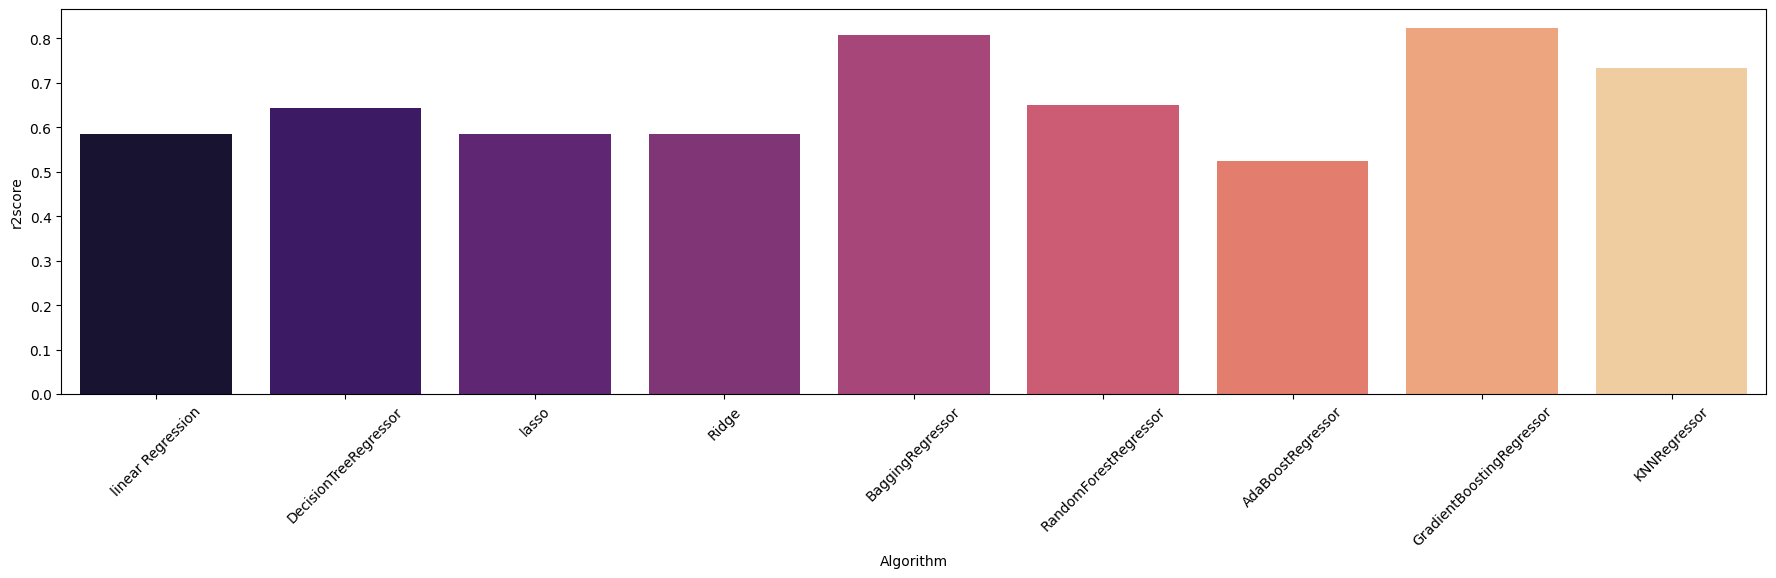

In [255]:
plt.figure(figsize=(22,5))

sns.barplot(summary, x="Algorithm", y="r2score",palette='magma')
plt.xticks(rotation=45)